In [ ]:
%load_ext autoreload
%autoreload 2

from header import *
from preprocessor import *
from mp_utility import *
from tensor_utility import *
from signal_utility import *
from mscred import *

SCALE_SIZES = [2,4,8,24,48]
STEP_LEN = 4

DATA_DIR = "F:/quant_data/prices/correlation_test_2021_hourly/"


In [6]:
SIGNAL_GROUPS = {
    'CHI.IDXUSD' : "000100",
    'EUS.IDXEUR' : "000200",
    'USA500.IDXUSD' : "000300",
    'USA30.IDXUSD' : "000400",
    'USSC2000.IDXUSD' : "000500",
    'GBR.IDXGBP' : "000600",
    'IND.IDXUSD' : "000700",
    'JPN.IDXJPY' : "000800",
    'FRA.IDXEUR' : "000900",
    'AUS.IDXAUD' : "001000",
    'PLN.IDXPLN' : "001100",
    'SGD.IDXSGD' : "001200",
    'HKG.IDXHKD' : "001300",
    'BRENT.CMDUSD' : "010100",
    'DIESEL.CMDUSD' : "010200",
    'GAS.CMDUSD' : "010300",
    'LIGHT.CMDUSD' : "010400",
    'COPPER.CMDUSD' : "010500",
    'COTTON.CMDUSX' : "010600",
    'SUGAR.CMDUSD' : "010700",
    'SOYBEAN.CMDUSX' : "010800",
    'COCOA.CMDUSD' : "010900",
    'COFFEE.CMDUSX' : "011000",
    'OJUICE.CMDUSX' : "011100",
    'XAGUSD' : "020100",
    'XAUUSD' : "020200",
    'GLD.USUSD' : "020300",
    'HSBA.GBGBX' : "030100",
    'LYXBNK.FREUR' : "030200",
    'LVC.FREUR' : "030300",
    'TECDAXE.DEEUR' : "030400",
    'SWEDA.SESEK' : "030500",
    'TLSN.SESEK' : "030600",
    'VOLVB.SESEK' : "030700",
    'EURUSD' : "040100",
    'EURJPY' : "040200",
    'EURSEK' : "040300",
    'EURGBP' : "040400",
    'EURAUD' : "040500",
    'EURCAD' : "040600",
    'EURCHF' : "040700",
    'EURCZK' : "040800",
    'EURRUB' : "040900",
    'EURHKD' : "041000",
    'EURHUF' : "041100",
    'EURDKK' : "041200",
    'EURNOK' : "041300",
    'EURNZD' : "041400",
    'EURPLN' : "041500",
    'EURSGD' : "041600",
    'EURTRY' : "041700",
    'USDCNH' : "041800",
    'USDJPY' : "041900",
    'USDHKD' : "042000",
    'USDTHB' : "042100",
    'USDCAD' : "042200",
    'USDCHF' : "042300",
    'USDCZK' : "042400",
    'USDDKK' : "042500",
    'USDNOK' : "042600",
    'USDPLN' : "042700",
    'USDRON' : "042800",
    'USDSEK' : "042900",
    'USDRUB' : "043000",
    'USDHUF' : "043100",
    'USDMXN' : "043200",
    'USDILS' : "043300",
    'USDSGD' : "043400",
    'USDTRY' : "043500",
    'USDZAR' : "043600",
    'GBPAUD' : "043700",
    'GBPCAD' : "043800",
    'GBPCHF' : "043900",
    'GBPNZD' : "044000",
    'GBPUSD' : "044100",
    'AUDNZD' : "044200",
    'AUDSGD' : "044300",
    'AUDUSD' : "044400",
    'CADCHF' : "044500",
    'CADHKD' : "044600",
    'GBPJPY' : "044700",
    'CADJPY' : "044800",
    'CHFJPY' : "044900",
    'TRYJPY' : "045000",
    'SGDJPY' : "045100",
    'NZDJPY' : "045200",
    'HKDJPY' : "045300",
    'CHFSGD' : "045400",
    'NZDCAD' : "045500",
    'NZDCHF' : "045600",
    'NZDUSD' : "045700",
}

In [7]:
# for aa in list_files( DATA_DIR ):
#     for tt in SIGNAL_GROUPS: 
#         if aa.startswith( tt ):
#             os.rename( DATA_DIR + aa, DATA_DIR + SIGNAL_GROUPS[ tt ] + "_" + aa )
#             print( "Renamed", aa, "with", SIGNAL_GROUPS[ tt ] + "_" + aa )


In [28]:
file_data = load_csv_files( DATA_DIR )


Loading:
	File-0: 000100_CHI.IDXUSD_Candlestick_1_Hour_BID_01.01.2021-12.06.2021.csv
	File-1: 000200_EUS.IDXEUR_Candlestick_1_Hour_BID_01.01.2021-12.06.2021.csv
	File-2: 000300_USA500.IDXUSD_Candlestick_1_Hour_BID_01.01.2021-12.06.2021.csv
	File-3: 000400_USA30.IDXUSD_Candlestick_1_Hour_BID_01.01.2021-12.06.2021.csv
	File-4: 000500_USSC2000.IDXUSD_Candlestick_1_Hour_BID_01.01.2021-12.06.2021.csv
	File-5: 000600_GBR.IDXGBP_Candlestick_1_Hour_BID_01.01.2021-12.06.2021.csv
	File-6: 000700_IND.IDXUSD_Candlestick_1_Hour_BID_01.01.2021-12.06.2021.csv
	File-7: 000800_JPN.IDXJPY_Candlestick_1_Hour_BID_01.01.2021-12.06.2021.csv
	File-8: 000900_FRA.IDXEUR_Candlestick_1_Hour_BID_01.01.2021-12.06.2021.csv
	File-9: 001000_AUS.IDXAUD_Candlestick_1_Hour_BID_01.01.2021-12.06.2021.csv
	File-10: 001100_PLN.IDXPLN_Candlestick_1_Hour_BID_01.01.2021-12.06.2021.csv
	File-11: 001200_SGD.IDXSGD_Candlestick_1_Hour_BID_01.01.2021-12.06.2021.csv
	File-12: 001300_HKG.IDXHKD_Candlestick_1_Hour_BID_01.01.2021-12.06

<AxesSubplot:xlabel='Local time'>

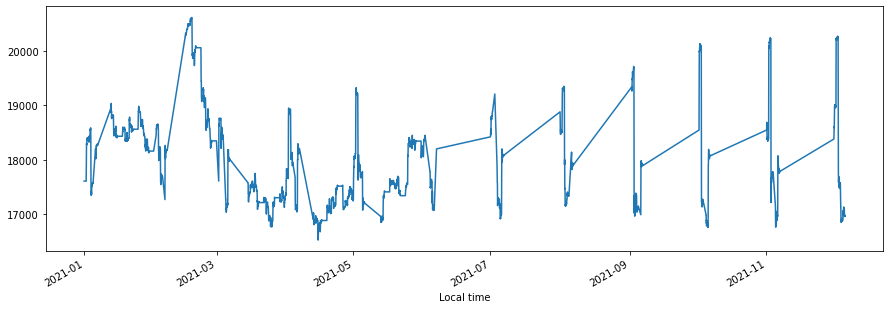

In [38]:
(
    file_data[ 0 ]
    .set_index(
        pd.to_datetime( file_data[ 0 ][ "Local time" ] )
    )
    .Close.plot( figsize = (15,5) )
)

In [20]:
# ## Gen and use random reference data.
# import random
# random.seed( 1 )
# def gen_test_random_walk( stdev, time_steps ):
#     ts = np.zeros( time_steps )
#     val = 0.0
#     for ii in range( time_steps ):
#         val += random.normalvariate( 0, stdev )
#         ts[ ii ] = val
#     return( ts )
# file_data = []
# for tt in range( 50 ):
#     file_data.append( gen_test_random_walk( 100.5, 1000 ) )
# plt.plot( file_data[ 0 ] )


In [21]:
# def price_diff_histogram( data_price, freq_clipping = 1000 ):
#     d_data_price = np.diff( data_price )
    
#     freq, bounds = np.histogram( d_data_price, bins = 128 )

#     bound_labels = [str( round( 10000*tt ) ) for tt in bounds[ :-1 ][ freq > 1 ]]
#     freq = np.clip( freq, 0, freq_clipping )[ freq > 1 ]

#     plt.figure( figsize = (15,5) )
#     plt.bar( bound_labels, freq )
#     plt.xticks( rotation = 50 )
#     plt.ylim( top = 400 )

# price_diff_histogram( file_data[ 0 ] )

In [41]:
close_price_data = [df.Close for df in file_data]
close_price_data[ 0 ]

0       17607.529
1       17607.529
2       17607.529
3       17607.529
4       17607.529
          ...    
2778    17761.729
2779    17773.679
2780    17786.729
2781    17792.999
2782    17785.479
Name: Close, Length: 2783, dtype: float64

In [42]:
## Output result should not contain any row.

probe = pd.DataFrame( [len( ss ) for ss in file_data] )
probe[ probe[ 0 ] < np.mean( probe[ 0 ] ) ] 

,0


In [43]:

data_train = np.asanyarray( close_price_data ).T
print( "data_train.shape:", data_train.shape )

TRAIN_SPLIT_PERCENTAGE = 0.7
total_train_sample_points = int( TRAIN_SPLIT_PERCENTAGE*data_train.shape[ 0 ] )

data_train_split_in = normalize_channels( data_train[ :total_train_sample_points, : ] )
print( "data_train_split_in.shape:", data_train_split_in.shape )

data_eval_split_in = normalize_channels( data_train[ total_train_sample_points:, : ] )
print( "data_eval_split_in.shape:", data_eval_split_in.shape )


data_train.shape: (2783, 91)
data_train_split_in.shape: (1948, 91)
data_eval_split_in.shape: (835, 91)


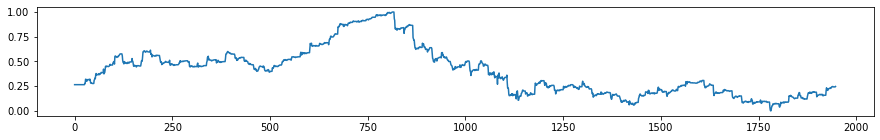

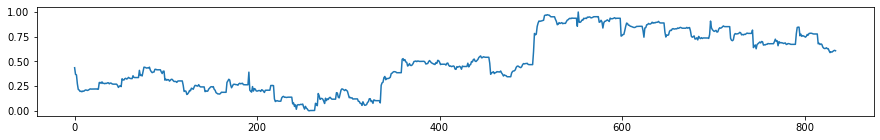

In [45]:
# sum_signal = np.sum( np.asanyarray( normalize_channels( file_data ) ), axis = 0 )
plt.figure( figsize = (15,2) )
plt.plot( data_train_split_in[ :, :1 ] )
plt.show()

plt.figure( figsize = (15,2) )
plt.plot( data_eval_split_in[ :, :1 ] )
plt.show()


In [46]:
train_split_in = generate_multiscale_signature_matrix_series( 
    "signature_matrix_func", 
#     "multi_ts_pearson_func", 
    SCALE_SIZES, 
    data_train_split_in
)
##TODO: normalize each window instead. 
eval_split_in = generate_multiscale_signature_matrix_series( 
    "signature_matrix_func", 
#     "multi_ts_pearson_func", 
    SCALE_SIZES, 
    data_eval_split_in 
)


Generating multiscale signature matrices...
	 current_scale: 2
Pool initiated...
Pool closed.
		 (1901, 91, 91, 1)
	 current_scale: 4
Pool initiated...
Pool closed.
		 (1901, 91, 91, 1)
	 current_scale: 8
Pool initiated...
Pool closed.
		 (1901, 91, 91, 1)
	 current_scale: 24
Pool initiated...
Pool closed.
		 (1901, 91, 91, 1)
	 current_scale: 48
Pool initiated...
Pool closed.
		 (1901, 91, 91, 1)
	 (1901, 91, 91, 5)
Generating multiscale signature matrices...
	 current_scale: 2
Pool initiated...
Pool closed.
		 (788, 91, 91, 1)
	 current_scale: 4
Pool initiated...
Pool closed.
		 (788, 91, 91, 1)
	 current_scale: 8
Pool initiated...
Pool closed.
		 (788, 91, 91, 1)
	 current_scale: 24
Pool initiated...
Pool closed.
		 (788, 91, 91, 1)
	 current_scale: 48
Pool initiated...
Pool closed.
		 (788, 91, 91, 1)
	 (788, 91, 91, 5)


In [47]:
# INPUT_OUTPUT_SAMPLE_GAP = STEP_LEN + max( SCALE_SIZES )
INPUT_OUTPUT_SAMPLE_GAP = 0

train_in = gen_rolling_window( train_split_in, STEP_LEN )
train_out = train_in[ INPUT_OUTPUT_SAMPLE_GAP:, -1, ...]
# train_out = np.pad( train_out, pad_width = [(0,INPUT_OUTPUT_SAMPLE_GAP), (0,0), (0,0), (0,0) ] )
train_in = train_in[ :train_out.shape[ 0 ], ... ]
print( "train_in.shape:", train_in.shape )
print( "train_out:", train_out.shape )

eval_in = gen_rolling_window( eval_split_in, STEP_LEN )
eval_out = eval_in[ INPUT_OUTPUT_SAMPLE_GAP:, -1, ...]
# eval_out = np.pad( eval_out, pad_width = [(0,INPUT_OUTPUT_SAMPLE_GAP), (0,0), (0,0), (0,0) ] )
eval_in = eval_in[ :eval_out.shape[ 0 ], ... ]
print( "eval_in.shape:", eval_in.shape )
print( "eval_out:", eval_out.shape )


train_in.shape: (1898, 4, 91, 91, 5)
train_out: (1898, 91, 91, 5)
eval_in.shape: (785, 4, 91, 91, 5)
eval_out: (785, 91, 91, 5)


probe.shape: (91, 91)


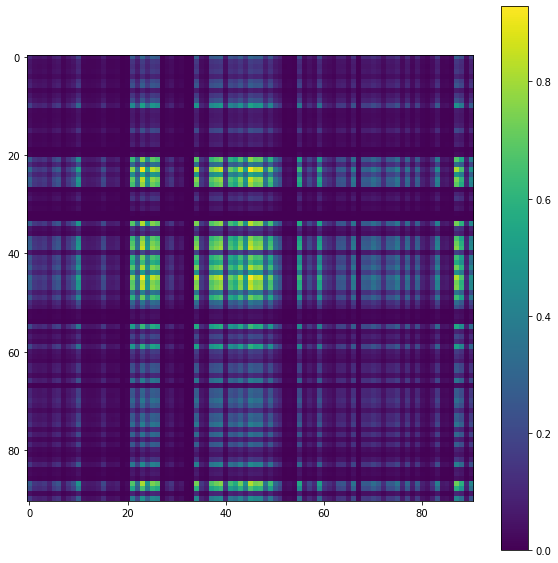

In [52]:
%matplotlib inline

# ## Load saved data. 
# with open( 'training.data', 'rb' ) as handle:
#     [data_train_split_in, data_eval_split_in, 
#         train_in, train_out, 
#         eval_in, eval_out] = pickle.load( handle )

probe = train_out[ 25, ..., 0 ]
print( "probe.shape:", probe.shape )

plt.figure( figsize = (10,10) )
img_resi = plt.imshow( probe )
plt.colorbar( img_resi )
plt.show()


In [ ]:
# ## Dump to cache. 
# print( "Dumping precomputed data...")
# with open( 'signature_matrix_training.data', 'wb' ) as handle:
#     pickle.dump( [
#         data_train_split_in, data_eval_split_in, 
#         train_in, train_out, 
#         eval_in, eval_out
#     ], handle, protocol = pickle.HIGHEST_PROTOCOL )
# print( "Done" )

In [130]:
# %matplotlib inline

# fig, ax = plt.subplots( figsize=(18, 18) )
# ax.grid()


# ax.imshow( 
#     list( normalize_channels( np.diff( dataset ) )[ :, : ] ), 
#     aspect='auto', 
#     interpolation = "Nearest", 
#     cmap = "jet"
# )

In [131]:
# %matplotlib inline

# ## (y > x) for the normal inner prod one. 
# pair_x_id = 20
# pair_y_id = 30

# plt.figure( figsize = (16, 8) )
# plt.plot( signature_matrix[ :,pair_y_id, pair_x_id ], color = "orange" )
# plt.plot( ts_data[ pair_x_id ], color = "black" )
# plt.plot( ts_data[ pair_y_id ], color = "gray" )


In [132]:
model = mscred.build_mscred( input_tensor = train_in )

def reduced_mean_loss( true_out, pred_out ):
    mse = tf.math.reduce_mean( tf.math.abs( true_out - pred_out ), axis = [-1,-2,-3] )
    return mse

model.compile( 
    optimizer = 'adam', 
    loss = reduced_mean_loss
#     loss = "mae"
)
model.summary()


Tensor("input_8:0", shape=(None, 4, 91, 91, 5), dtype=float32)
Tensor("time_distributed_28/Reshape_1:0", shape=(None, 4, 91, 91, 32), dtype=float32)
Tensor("time_distributed_29/Reshape_1:0", shape=(None, 4, 46, 46, 64), dtype=float32)
Tensor("time_distributed_30/Reshape_1:0", shape=(None, 4, 23, 23, 128), dtype=float32)
Tensor("time_distributed_31/Reshape_1:0", shape=(None, 4, 12, 12, 256), dtype=float32)
Tensor("conv_lstm_0/strided_slice_26:0", shape=(None, 91, 91, 32), dtype=float32)
Tensor("conv_lstm_1/strided_slice_26:0", shape=(None, 46, 46, 64), dtype=float32)
Tensor("conv_lstm_2/strided_slice_26:0", shape=(None, 23, 23, 128), dtype=float32)
Tensor("conv_lstm_3/strided_slice_26:0", shape=(None, 12, 12, 256), dtype=float32)
Tensor("conv2d_transpose_28/Selu:0", shape=(None, 24, 24, 128), dtype=float32)
Tensor("conv2d_transpose_29/Selu:0", shape=(None, 46, 46, 64), dtype=float32)
Tensor("conv2d_transpose_30/Selu:0", shape=(None, 92, 92, 32), dtype=float32)
Tensor("conv2d_transpose_3

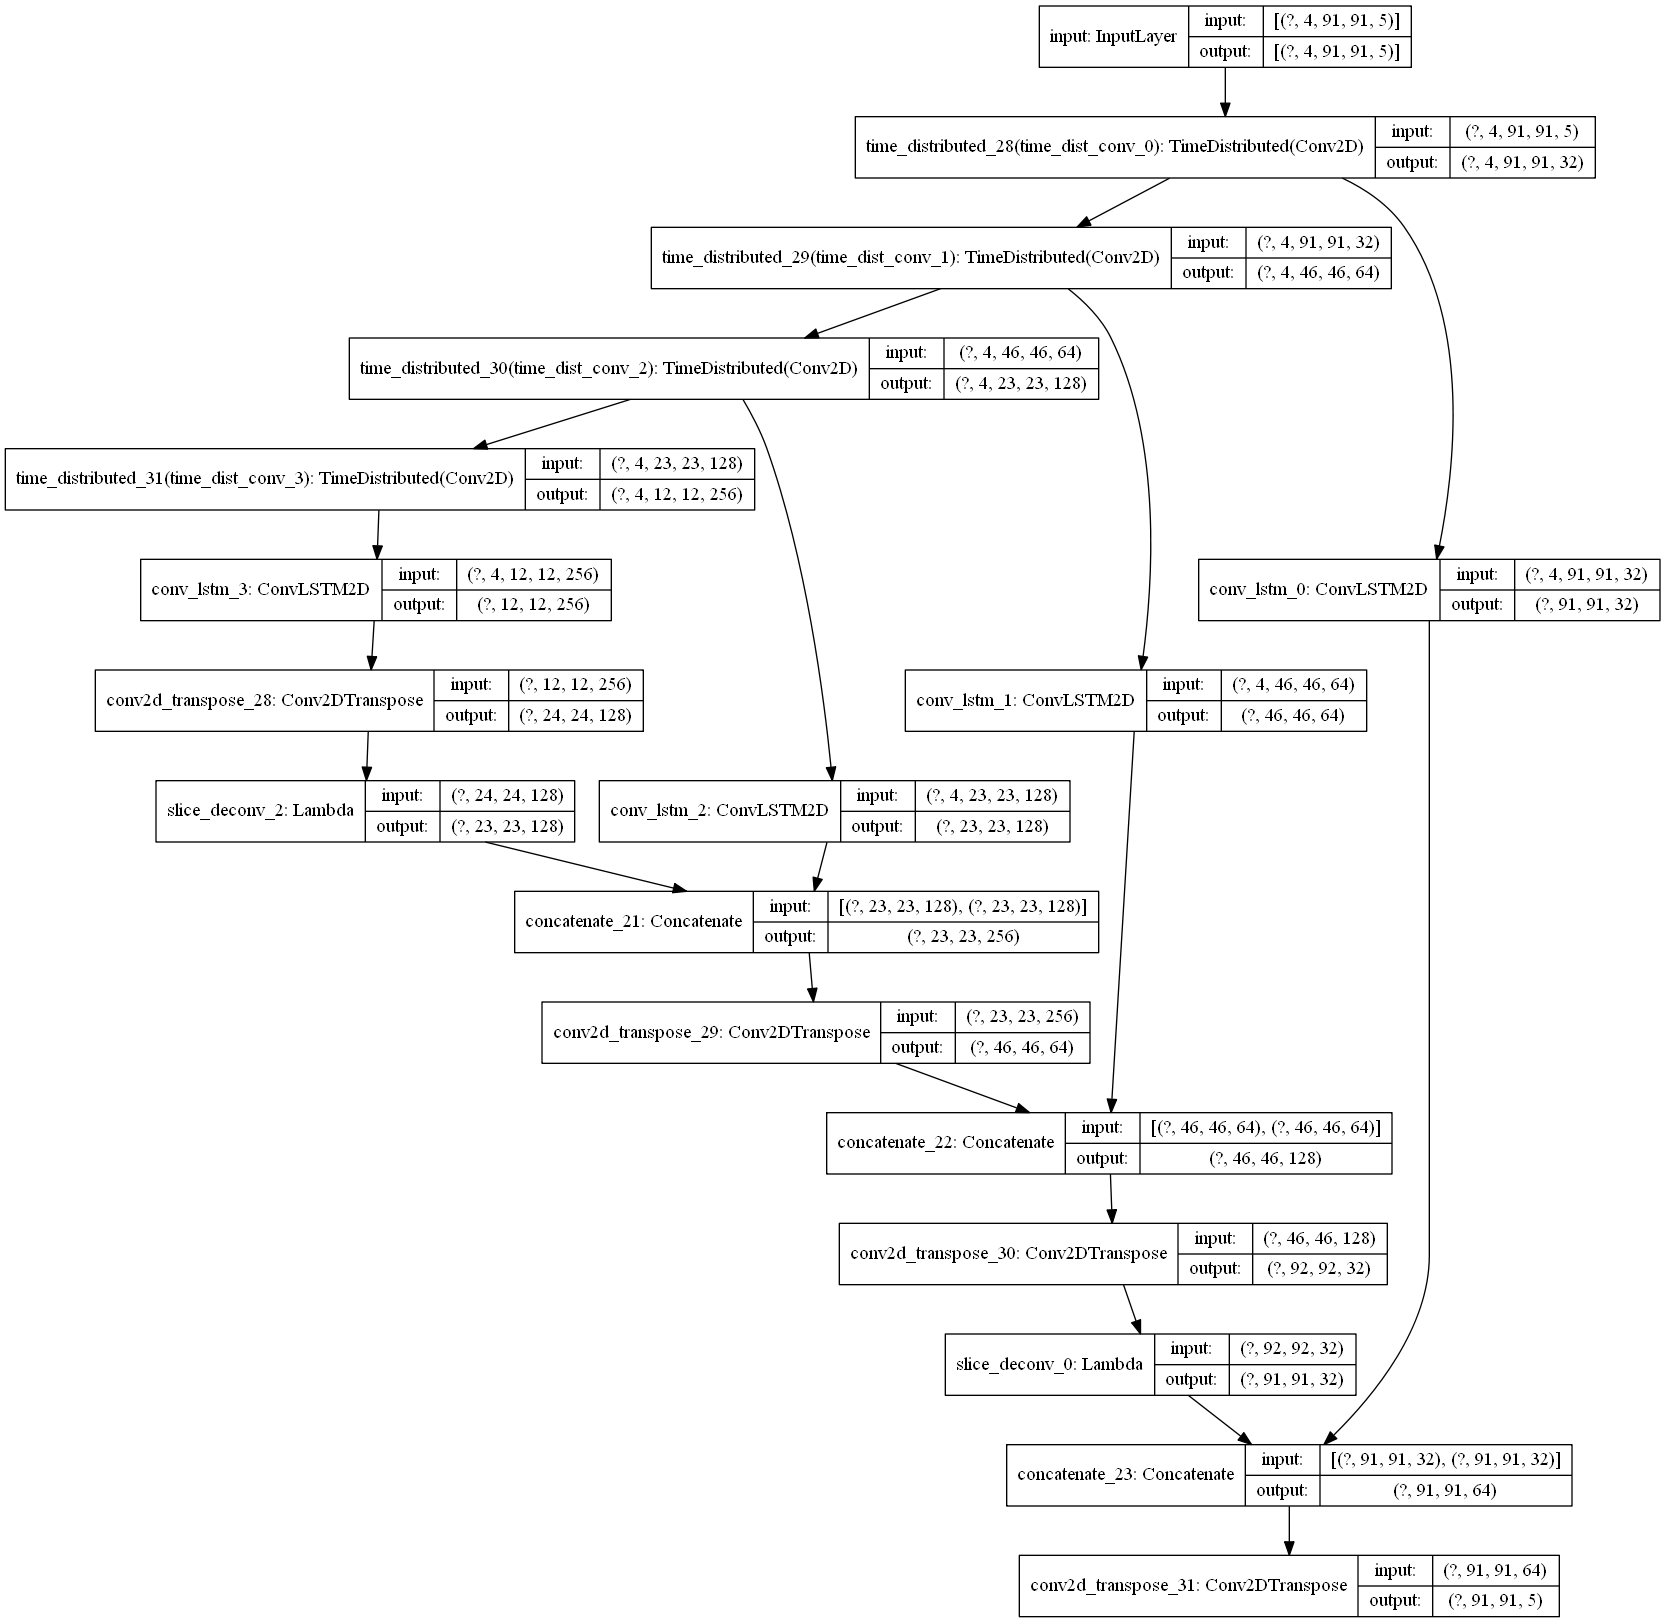

In [133]:
keras.utils.plot_model( model, show_shapes = True )

In [134]:
checkpoint_model = keras.callbacks.ModelCheckpoint(
    "model_middle_poc_signature_matrix.h5", 
    verbose = True, 
    save_best_only = True, 
    mode = 'auto', 
    save_freq = "epoch" 
)

try:
    model.fit( 
        train_in, train_out, 
        epochs = 256, 
        batch_size = 4, 
        validation_data = (eval_in, eval_out), 
#         shuffle = True
#         validation_split  = 0.2,
        verbose = 1, 
        callbacks = [checkpoint_model] 
    )
    winsound.Beep( 880, 2000 )
except KeyboardInterrupt:
    print( "\nBreak!")

Epoch 1/256
475/475 [==============================] - ETA: 0s - loss: 0.1490
Epoch 00001: val_loss improved from inf to 0.07174, saving model to model_middle_poc_signature_matrix.h5
475/475 [==============================] - 78s 164ms/step - loss: 0.1490 - val_loss: 0.0717
Epoch 2/256
475/475 [==============================] - ETA: 0s - loss: 0.0516
Epoch 00002: val_loss improved from 0.07174 to 0.03819, saving model to model_middle_poc_signature_matrix.h5
475/475 [==============================] - 78s 163ms/step - loss: 0.0516 - val_loss: 0.0382
Epoch 3/256
475/475 [==============================] - ETA: 0s - loss: 0.0314
Epoch 00003: val_loss improved from 0.03819 to 0.02641, saving model to model_middle_poc_signature_matrix.h5
475/475 [==============================] - 75s 158ms/step - loss: 0.0314 - val_loss: 0.0264
Epoch 4/256
475/475 [==============================] - ETA: 0s - loss: 0.0226
Epoch 00004: val_loss improved from 0.02641 to 0.01948, saving model to model_middle_poc_

Epoch 33/256
475/475 [==============================] - ETA: 0s - loss: 0.0075
Epoch 00033: val_loss improved from 0.00670 to 0.00665, saving model to model_middle_poc_signature_matrix.h5
475/475 [==============================] - 75s 158ms/step - loss: 0.0075 - val_loss: 0.0067
Epoch 34/256
475/475 [==============================] - ETA: 0s - loss: 0.0074
Epoch 00034: val_loss improved from 0.00665 to 0.00650, saving model to model_middle_poc_signature_matrix.h5
475/475 [==============================] - 75s 158ms/step - loss: 0.0074 - val_loss: 0.0065
Epoch 35/256
475/475 [==============================] - ETA: 0s - loss: 0.0071
Epoch 00035: val_loss did not improve from 0.00650
475/475 [==============================] - 75s 157ms/step - loss: 0.0071 - val_loss: 0.0080
Epoch 36/256
475/475 [==============================] - ETA: 0s - loss: 0.0073
Epoch 00036: val_loss improved from 0.00650 to 0.00636, saving model to model_middle_poc_signature_matrix.h5
475/475 [=====================

In [135]:
# ## Load saved data. 
# with open( 'signature_matrix_training.data', 'rb' ) as handle:
#     [data_train_split_in, data_eval_split_in, 
#         train_in, train_out, 
#         eval_in, eval_out] = pickle.load( handle )

# model = keras.models.load_model( "model_middle_poc_signature_matrix.h5" )

In [136]:
pred_out = model.predict( 
    eval_in, 
    batch_size = 4, 
    verbose = 1 
)


197/197 [==============================] - 5s 25ms/step


In [157]:
# matrix_resi = np.abs( np.diff( eval_out, append = 0 ) )

# matrix_resi = train_in[ :, 0, ..., 0 ]

matrix_resi = np.abs( pred_out[ :, ] - eval_out[ :, : ] )
matrix_resi = np.average( matrix_resi, axis = -1 )


print( matrix_resi.shape )

scalar_resi = reduced_mean_loss( pred_out, eval_out )
scalar_resi.shape

(785, 91, 91)


TensorShape([785])

In [178]:
TREND_LINE_DATA_ID = 34
ZOOM_RANGE = int( 1/4*SCALE_SIZES[ -1 ] )
time_series = data_eval_split_in[ INPUT_OUTPUT_SAMPLE_GAP:, TREND_LINE_DATA_ID ]
# time_series = scalar_resi[ STEP_LEN + 1: ]


CROP_PIXELS = 1
matrix_series = matrix_resi[ :, CROP_PIXELS:-CROP_PIXELS, CROP_PIXELS:-CROP_PIXELS ] 

# matrix_series = matrix_resi 

# matrix_series = np.average( pred_out, axis = -1 ) 

# matrix_series = eval_in[ :, 0,..., 0 ] - eval_out[ ..., 0 ]


animate_matrix_series( 
    matrix_series = matrix_series, 
    time_series = time_series, 
    time_interval = 100*4, 
    zoom_range = ZOOM_RANGE, 
    fig_size = (7,7), 
    ts_tick_freq = 2
)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Output()

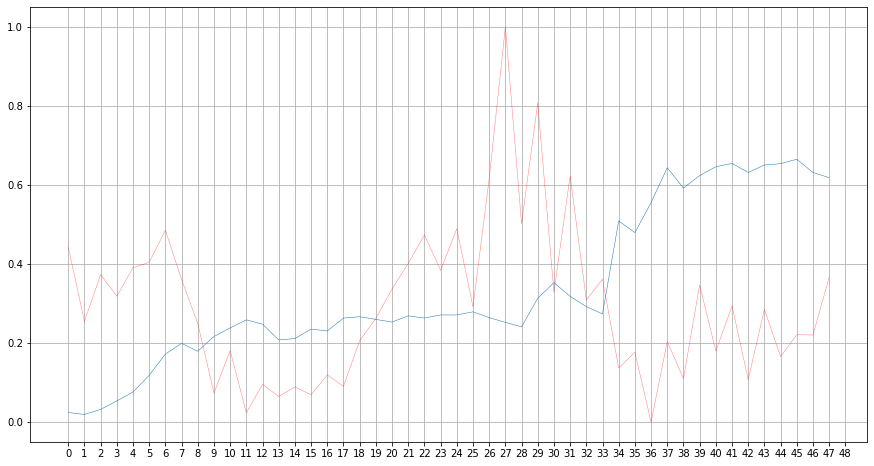

In [179]:
%matplotlib inline

TOTAL_TAIL_CUT = 0
STARTING_DAY = 8
TOTAL_DAYS = 2
TICK_FREQ = 1

plt.figure( figsize = (15, 8) )
raw_signal = data_eval_split_in[ 
    (INPUT_OUTPUT_SAMPLE_GAP + STARTING_DAY*24):(INPUT_OUTPUT_SAMPLE_GAP + (STARTING_DAY + TOTAL_DAYS)*24 - TOTAL_TAIL_CUT), 
    TREND_LINE_DATA_ID 
]
plt.plot( 
    raw_signal, 
#     savitzky_golay( raw_signal, 7, 3 ), 
    linewidth = 0.5 
)

residual_signal = scalar_resi[ STARTING_DAY*24:(STARTING_DAY + TOTAL_DAYS)*24 - TOTAL_TAIL_CUT ]
plt.plot( 
#     savitzky_golay( normalize_channels( residual_signal[...,np.newaxis] )[ :,0 ], 5, 3 ), 
#     savitzky_golay( residual_signal, 5, 3 )/8.0 - 0.8, 
    normalize_channels( residual_signal[...,np.newaxis] )[ :,0 ]/1.0 + 0.0, 
    linewidth = 0.5, color = "red", alpha = 0.5
)
plt.xticks( np.arange( 0, len( residual_signal ) + 1, TICK_FREQ ) )
plt.grid()


In [18]:
probe = pd.DataFrame( list_files( DATA_DIR ) )
probe[ 60:90 ]

,0
60,042700_USDPLN_Candlestick_1_Hour_BID_01.01.202...
61,042800_USDRON_Candlestick_1_Hour_BID_01.01.202...
62,042900_USDSEK_Candlestick_1_Hour_BID_01.01.202...
63,043000_USDRUB_Candlestick_1_Hour_BID_01.01.202...
64,043100_USDHUF_Candlestick_1_Hour_BID_01.01.202...
65,043200_USDMXN_Candlestick_1_Hour_BID_01.01.202...
66,043300_USDILS_Candlestick_1_Hour_BID_01.01.202...
67,043400_USDSGD_Candlestick_1_Hour_BID_01.01.202...
68,043500_USDTRY_Candlestick_1_Hour_BID_01.01.202...
69,043600_USDZAR_Candlestick_1_Hour_BID_01.01.202...


In [20]:
# plt.figure( figsize = (15,8))

# plt.plot( data_raw[ 34, (train_split_in.shape[ 0 ] + 1): ] )